In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('/content/Students.csv')
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


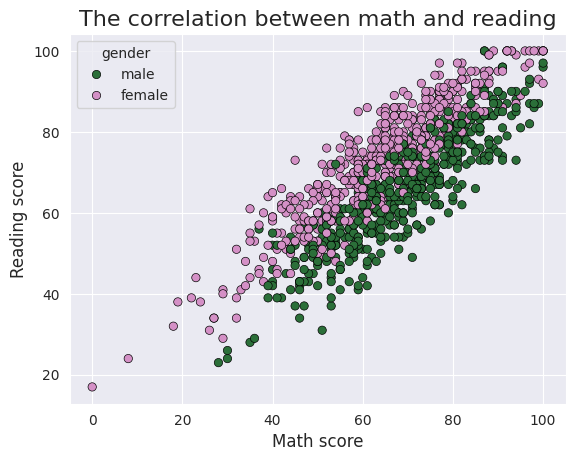

In [4]:
sns.set_style('darkgrid')

plt.title('The correlation between math and reading', size=16)
plt.xlabel('Math score', size=12)
plt.ylabel('Reading score', size=12)

sns.scatterplot(
    x='math_score',
    y='reading_score',
    data=df,
    hue='gender',
    edgecolor='black',
    palette='cubehelix',
    hue_order=['male','female']
)

plt.show()

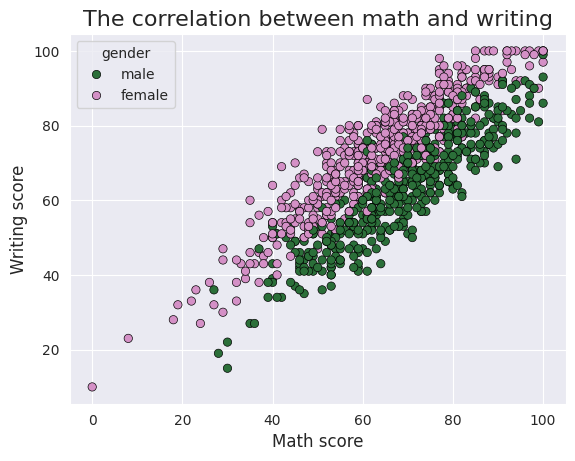

In [ ]:
sns.set_style('darkgrid')

plt.title('The correlation between math and writing', size=16)
plt.xlabel('Math score', size=12)
plt.ylabel('Writing score', size=12)

sns.scatterplot(
    x='math_score',
    y='writing_score',
    data=df,
    hue='gender',
    edgecolor='black',
    palette='cubehelix',
    hue_order=['male','female']
    )

plt.show()


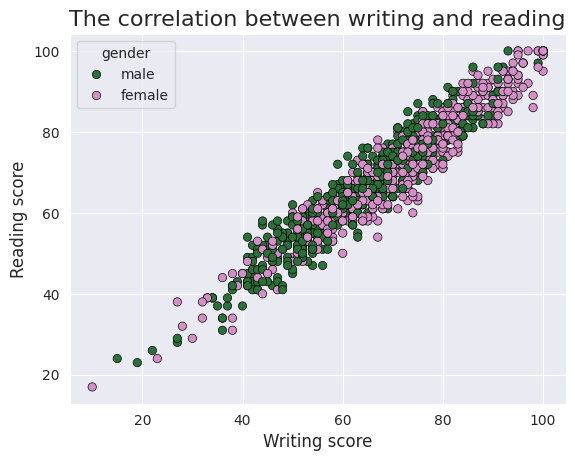

In [ ]:
sns.set_style('darkgrid')

plt.title('The correlation between writing and reading', size=16)
plt.xlabel('Writing score', size=12)
plt.ylabel('Reading score', size=12)

sns.scatterplot(
    x='writing_score',
    y='reading_score',
    data=df,
    hue='gender',
    edgecolor='black',
    palette='cubehelix',
    hue_order=['male','female']
    )

plt.show()


<ipython-input-42-fd0ea8dfbe5a>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=kde_data, shade=True, palette='colorblind')


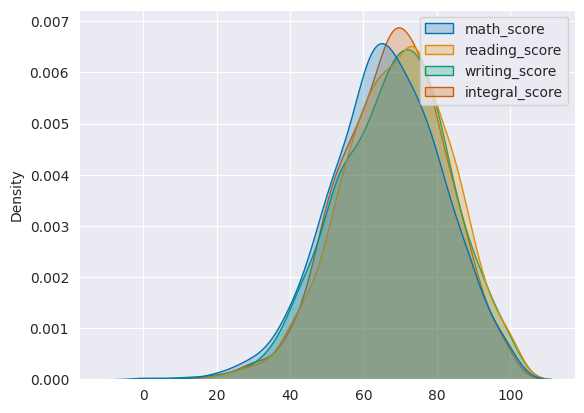

In [ ]:
total_marks = ((df['math_score'] + df['reading_score'] + df['writing_score'])/300)*100
df['integral_score'] = total_marks
kde_data = df[['math_score', 'reading_score', 'writing_score', 'integral_score']]
sns.set_style("darkgrid")
sns.kdeplot(data=kde_data, shade=True, palette='colorblind')
plt.show()


In [ ]:
male = df[df['gender'] == 'male']
female = df[df['gender'] == 'female']

corr_m = male['math_score'].corr(male['reading_score'])
corr_fem =  female['math_score'].corr(female['reading_score'])

print(
    f"""
    Correlation between math score and reading score for men = {corr_m}
    Correlation between math score and reading score for women = {corr_fem}
    """
    )


    Correlation between math score and reading score for men = 0.8854888777758607
    Correlation between math score and reading score for women = 0.9092539964405932
    


In [ ]:
corr_m = male['math_score'].corr(male['writing_score'])
corr_fem = female['math_score'].corr(female['writing_score'])

print(
    f"""
    Correlation between math score and wtiring score for men = {corr_m}
    Correlation between math score and wtiring score for women = {corr_fem}
    """
    )


    Correlation between math score and wtiring score for men = 0.8919728937331356
    Correlation between math score and wtiring score for women = 0.920729249844532
    


In [ ]:
corr_m = male['writing_score'].corr(male['reading_score'])
corr_fem = female['writing_score'].corr(female['reading_score'])

print(
    f"""
    Correlation between wtiring score and reading score for men = {corr_m}
    Correlation between wtiring score and reading score for women = {corr_fem}
    """
    )


    Correlation between wtiring score and reading score for men = 0.9506266235530413
    Correlation between wtiring score and reading score for women = 0.9547251346705242
    


# Линейная регрессия

## Построение регрессионной модели на всей выборке

In [5]:
reg = LinearRegression()
scaler = StandardScaler()

pipe = Pipeline([('scaler', scaler), ('reg', reg)])

X = np.array(df['math_score']).reshape(-1, 1)
y = np.array(df['reading_score']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)

In [6]:
def visualization(X_test, pred, data, *, hue=None, hue_order=None, color='blue'):
  sns.set_style('darkgrid')

  plt.title('The correlation between math and reading', size=16)
  plt.xlabel('Math score', size=12)
  plt.ylabel('Reading score', size=12)

  sns.scatterplot(
      x='math_score',
      y='reading_score',
      data=data,
      hue=hue,
      edgecolor='black',
      palette='cubehelix',
      hue_order=hue_order,
      color=color
  )

  sns.lineplot(x=X_test[:, 0], y=pred[:, 0])

  plt.show()

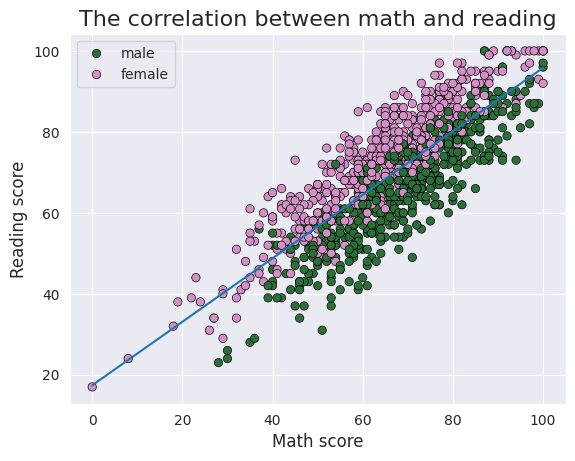

In [7]:
visualization(X_test, pred, df, hue='gender', hue_order=['male', 'female'])

## Построение регрессионной модели на разделённой выборке

### Построение регрессии только по мужчинам

In [12]:
male_data = df[df['gender'] == 'male']

X_male = np.array(male_data['math_score']).reshape(-1, 1)
y_male = np.array(male_data['reading_score']).reshape(-1, 1)

X_male_train, X_male_test, y_male_train, y_male_test = train_test_split(
    X_male, y_male,
    test_size=0.2,
    random_state=41
)

pipe.fit(X_male_train, y_male_train)
male_pred = pipe.predict(X_male_test)

<ipython-input-6-b699ca0f7735>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


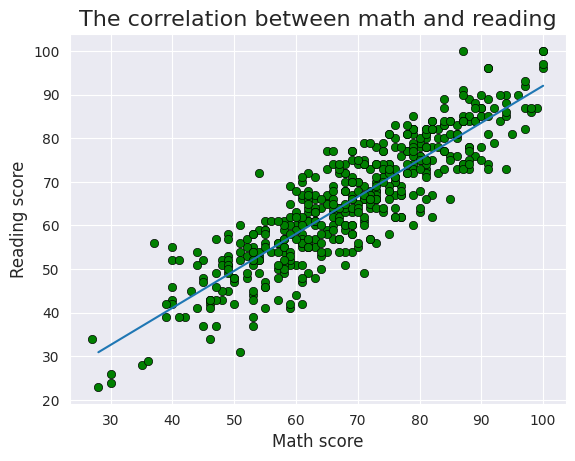

In [13]:
visualization(X_male_test, male_pred, male_data, color='green')

### Построение регрессии только по женщинам

In [10]:
fem_data = df[df['gender'] == 'female']

X_fem = np.array(fem_data['math_score']).reshape(-1, 1)
y_fem = np.array(fem_data['reading_score']).reshape(-1, 1)

X_fem_train, X_fem_test, y_fem_train, y_fem_test = train_test_split(
    X_fem, y_fem,
    test_size=0.2,
    random_state=40
)

pipe.fit(X_fem_train, y_fem_train)
fem_pred = pipe.predict(X_fem_test)

<ipython-input-6-b699ca0f7735>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


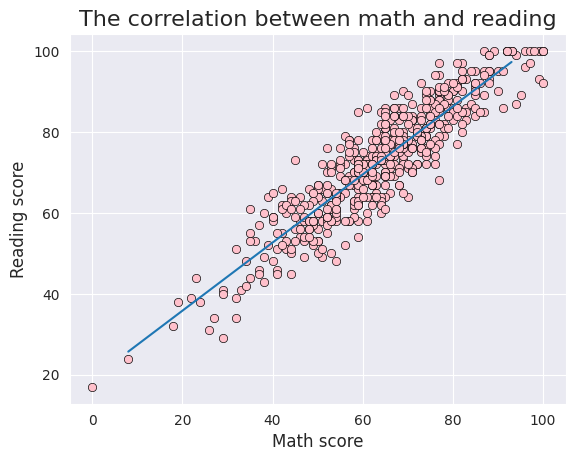

In [11]:
visualization(X_fem_test, fem_pred, fem_data, color='pink')

### Вычисления значений среднеквадртичной ошибки

In [21]:
full_mse = mean_squared_error(y_test, pred)
male_mse = mean_squared_error(y_male_test, male_pred)
fem_mse = mean_squared_error(y_fem_test, fem_pred)

loss_dict = {
    'Full MSE':full_mse,
    'Male MSE':male_mse,
    'Female MSE':fem_mse
}

loss_table = pd.Series(loss_dict, name='loss')

loss_table

,loss
Full MSE,72.284460
Male MSE,40.616269
Female MSE,30.933958


### Выводы

In [24]:
print(
    """
    После разделения выборки на две части по признаку пола,
    я могу резюмировать, что мне удалось сократить среднеквадратичную
    ошибку на полном наборе данных({:.2f}) в два раза.
    MSE для мужчин и женщин составило
    {:.2f}  и {:.2f} соотвественно.
    """.format(full_mse, male_mse, fem_mse)
)


    После разделения выборки на две части по признаку пола,
    я могу резюмировать, что мне удалось сократить среднеквадратичную
    ошибку на полном наборе данных(72.28) в два раза.
    MSE для мужчин и женщин составило
    40.62  и 30.93 соотвественно.
    
